# Programming for Data Analytics -  numpy.random - Assignment
### Eoin Lees - G00387888 - November 2020
------------

## Section 1. Explain the overall purpose of the package.
--------------

## <u>numpy.random</u> 

The overall purpose of the numpy.random package is to "produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions" [1]

A random number does not mean a different number every time. Random means something that cannot be predicted logically. In order for a computer to achieve this it uses BitGenerators to create a number based on a generation algorithm. These are known as psudo random numbers. [2]


##### BitGenerators: 

Objects that generate random numbers. These are typically unsigned integer words filled with sequences of either 32 or 64 random bits. There are a number of different generators than can be used for this since Numpy version 1.17.0. The use of seeds and there effects on this is explored further in section 4.   

##### Generators: 

Objects that transform sequences of random bits from a BitGenerator into sequences of numbers that follow a specific probability distribution (such as uniform, Normal or Binomial) within a specified interval. In this document there is a description of the following distributions  in section 3: 

* Von meises 
* Binomial
* Uniform
* Normal
* Chi squared

[3]
It is possible to create real random numbers using a true random number generator. An example of this can be seen at https://www.random.org/integers/ which uses atmospheric noise to create true random numbers. However this is a lot more involved and for the purpose of this analysis not relevant. 

It is worth noteing however that it is commonly reccomended not use psudo-random number generators if you require a cryptographically secure number. 

In [1]:
# Import all modules for this notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Section 2. Explain the use of the “Simple random data” and “Permutations” functions.
-----------

## <u>Simple Random Data</u>

[4]

Simple random data is broken down below into the following:

* random
* integers
* choice
* bytes

-------------


* ### Random

**numpy.random.rand(d0, d1, ..., dn)**

Creates a random number between 0 and 1 that is uniformilly distributed. [5]

* Parameters 
    * d0, d1, …, dnint, optional
    * The dimensions of the returned array, must be non-negative. If no argument is given a single Python float is returned.

* Returns
    * out: ndarray, shape (d0, d1, ..., dn)
    * Random values.

Note: for more information on this function see numpy documentation. [5]

Examples:

In [2]:
np.random.rand()
# creates a random number between 0 and 1. Uniformily distributed. 

0.7605309095106956

In [3]:
x = np.random.rand(4,2)
# creates an array with 4 lists of 2 random numbers 
x

array([[0.95336108, 0.23565752],
       [0.90891174, 0.26923782],
       [0.27868305, 0.77981463],
       [0.51765927, 0.51471566]])

The above examples show how to use numpy.random.rand(). As stated in the parameters the dimensions of the returned array must be non negative. 

-------------

* ### Integers

**Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)**

Integers returns random integers from low to high (not included). it returns ranndom integers from the “discrete uniform” distribution of the specified dtype. If high is None (the default), then results are from 0 to low. [6]

* Parameters 
    * low: the lowest value to select from. 
    * high: the highest value to select from. 
    * size: the output shape. number of values returned or number of values and lists returned. 
    * dtype: dtype, default is np.int64
    * endpoint: If true, sample from the interval [low, high] instead of the default [low, high) Defaults to False
   

* Returns
    * out: (int or ndarray of ints) size-shaped array of random integers from the appropriate distribution, or a single such random int if size not provided.

Note: for more information on this function see numpy documentation. [6]

Examples:


In [4]:
#  create rng - random number generator object
rng = np.random.default_rng()

In [5]:
# use rng to generate sequence of random integers
rng.integers(3, size=15)

array([1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 2, 1, 1], dtype=int64)

This generates a series of 15 numbers up to but not inclusive of 3. The data type is "int64" by default. It shows how by default the low parameter is 0 and the high value is stated as 3. 

In [6]:
# using the size parameter to generate a 3 x 5 array.
rng.integers(5, size=(3, 5))

array([[1, 2, 1, 3, 2],
       [1, 2, 1, 0, 0],
       [3, 0, 4, 1, 0]], dtype=int64)

Again this demonstrates the high value set at 5. The size parameter states two variables, the first is the number of arrays, in this case three. The second states the number of elements in each array. The size parameter allows further dimension to be added along the 3rd and 4th dimensions etc. This allows complex data structures be formed. 

In [7]:
# Test the distribution of the random data
x = rng.integers(100, size=100)

Here we create an array of 100 values in order to determine what kind of distribution is set as default. 

(array([12., 10., 13.,  4., 11.,  8., 12., 15.,  9.,  6.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

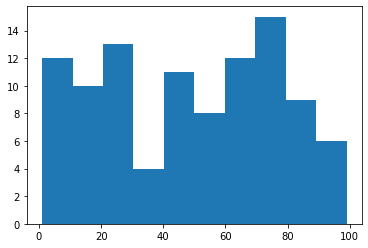

In [8]:
# Create histogram of plot
plt.hist(x)

This profile is quite varied. It does not allow us to determine much based off the limited number of random values. 

(array([1000080., 1000486.,  998951., 1000206.,  999722., 1000294.,
         999531., 1001248.,  999511.,  999971.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

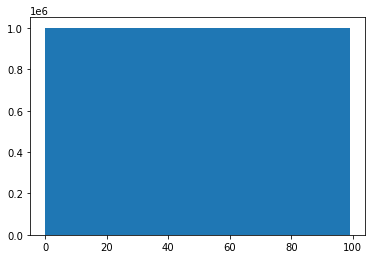

In [9]:
# set size = 10000000
x = rng.integers(100, size=10000000)
plt.hist(x)

When we set the size the ten million we see that the profile of this data is flat. The distribution of numbers into each 20 unit bar seems to be the same.
This is known as a uniform distribution, which is rare in a real world situation. 

--------------

* ### Choice 

**Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)**
 
 Creates a random sample from a given array. [7]
 

* Parameters 
    * a: array. if ndarray, random sample generated from its elements. if int, random sample generated from np.arrange(a)
    * size: output size
    * replace: Whether the sample is with or without replacement
    * p: the probabilities associated with each entry in a. 
    * axis: The axis along which the selection is performed. The default, 0, selects by row.
    * shuffle: Whether the sample is shuffled when sampling without replacement. 


* Returns
    * samples: returns a single item or the generated ndarray

Note: for more information on this function see numpy documentation. [7]

Examples:

In [10]:
rng = np.random.default_rng()
rng.choice(10, 3)

#This is equivalent to rng.integers(0,5,3)
# Picks 3 random numbers between 0 and 10
# generate a uniform random sample from np.arange(5) of size 3:


array([8, 2, 2], dtype=int64)

(array([ 9940.,  9947.,  9953., 10028., 10033.,  9917.,  9985., 10055.,
        10017., 10125.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

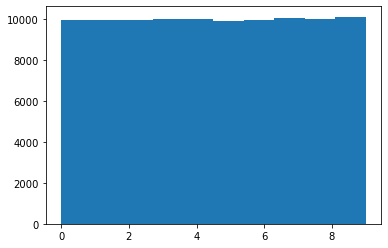

In [11]:
# show that sample is uniformly distributed
x = rng.choice(10, 100000)
plt.hist(x)

The histogram shows that the data produced by choice is uniformly distributed. 

In [12]:
rng.choice(["car", "bar", "star", "tar"], 2)

# generates a random sample of size 2 of the list given. 

array(['tar', 'tar'], dtype='<U4')

The choice command can be used to randomly select inputted strings also as shown above.

In [13]:
rng.choice(["car", "bar", "star", "tar"], 4, p=[0.1, 0.1, 0.6, 0.2])
# adding probabilities

array(['bar', 'star', 'star', 'star'], dtype='<U4')

(array([5973.,    0.,    0.,  971.,    0.,    0., 1049.,    0.,    0.,
        2007.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

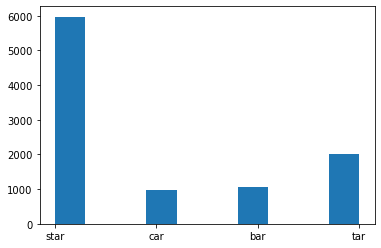

In [14]:
x = rng.choice(["car", "bar", "star", "tar"], 10000, p=[0.1, 0.1, 0.6, 0.2])
plt.hist(x)
# plotting command run 10000 times

Using the p parameter we can set the probability of each entity. We can prove this probability by running the command 10,000 times and protting the results. 

-----------------

* ### Bytes

**Generator.bytes(length)**

Returns a string of random bytes of specified length method : Generator.bytes(length) 

* Parameters 
    * length: the number of random bytes required. 
   
* Returns
    * out: string of length length

Note: for more information on this function see numpy documentation. [8]

Examples:

In [15]:
np.random.default_rng().bytes(20)

b'\xf4\x0f^\xbf\xc6W\xd2|\xb6H\x06\xf8\xce\x8d\x1a\xf7]8\xd9"'

Returns a string of random bytes of length 20. 

--------------

## <u>Permutations</u>
-----------



* ### Shuffle

**Generator.shuffle(x, axis=0)**
 
Modifies a sequence by change the order of its contents. The contents remain unchanged, only their order is changed. [9]
 

* Parameters 
    * x: the array or list to be shuffled
    * axis: the axis to shuffle x along. 

* Returns
    * None
    
Note: for more information on this function see numpy documentation. [9]

Examples

In [16]:
# Example of arrange on integers. 

arr = np.arange(10)

print("The following is 10 numbers arranged in ascending order: ", arr)
rng.shuffle(arr)
print("The following is the same 10 numbers shuffled and reprinted: ", arr)

The following is 10 numbers arranged in ascending order:  [0 1 2 3 4 5 6 7 8 9]
The following is the same 10 numbers shuffled and reprinted:  [7 5 8 3 9 1 0 6 2 4]


In [17]:
# Using shuffle to shuffle a list of strings. 

x = ["car", "bar", "star", "tar"]
np.random.shuffle(x)
print(x)

['tar', 'star', 'bar', 'car']


Shuffle is a simple command that can be used to easily mix the arrangement of a list randomly as show above. The data can be a list, a tuple or a string. 

--------------------

* ### Permutations

**Generator.permutation(x, axis=0)**
 
randomly permutes a sequence or returnes a range of permuted values. [10] 

"In mathematics, a permutation of a set is an arrangement of its members into a sequence or linear order, or if the set is already ordered, a rearrangement of its elements. The word "permutation" also refers to the act or process of changing the linear order of an ordered set" [11]
 

* Parameters 
    * x: Randomly permutate if x is integar. If array, make copy then shuffle elements.
    * axis: The axis which x is shuffled along. Default is 0.

* Returns
    * out: ndarray - permuted sequence or array range. 
    
Note: for more information on this function see numpy documentation. [10]

Examples


In [18]:
# permutate 
rng.permutation(10)

array([0, 6, 3, 2, 8, 5, 4, 1, 7, 9])

In [19]:
# permutate given list
rng.permutation([2, 4, 5, 9, 16, 18])

array([ 4,  2, 18,  5, 16,  9])

In [20]:
# example of permutation command on printed set of data. 
arr = np.arange(16).reshape((4, 4))
print("First set: \n", arr)
print("second set: \n", rng.permutation(arr))

First set: 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
second set: 
 [[ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  1  2  3]
 [12 13 14 15]]


Permutations is another method of rearranging data. The feild of permutations is detailed and well studied. A rubix cube is a practical example of permutations. Each time you turn the cube there is another set of the same data in a different permutation. More information can be found here. [12]

------------

## Section 3. Explain the use and purpose of at least five “Distributions” functions.
------------

* ### Distribution 1: von meises

**numpy.random.vonmises(mu, kappa, size=None)**
 
Draws a sample from a von meises distribution. Samples are drawn with specific mode(mu) and dispersion(kappa) on the interval [-π, π]  [13] 

"The Von Mises distribution (also called the circular normal or Tikhonov distribution) is a continuous probability distribution with a range from 0 to 2π, aka a circle. It is similar to the normal distribution, except coordinates are placed on a circular plane. The von Mises distribution can be thought of as a special case of the Von Mises-Fisher distribution, which is an extension of the distribution to multi-dimensional spheres.

The distribution was first described by Richard von Mises in 1918 as a way to model the distribution of atomic weights. It’s now used to model a variety of phenomena including:

* Brownian motion (Physics),
* Epidemiology (spread of disease),
* Interference Alignment (Signal Processing),
* Privacy-preserving algorithms in (Machine Learning)." [14]
 

* Parameters 
    * mu: mode or centre of the distribution.
    * kappa: dispersion of teh distribution. Must be greater than or equal to 0. 
    * size: output shape.
    
* Returns
    * out: ndarray or scalar - Drawn samples from the parameterized von Mises distribution. 
    
Note: for more information on this function see numpy documentation. [13]

Examples

In [21]:
mu, kappa = 0.0, 4.0 # mean and dispersion
s = np.random.vonmises(mu, kappa, 1000)
s # Display array

array([ 1.91473225e-01,  6.36207107e-01, -7.12470207e-01,  4.80237313e-01,
        3.34588895e-01, -5.85626837e-01, -1.33178531e+00,  2.14016416e-01,
        6.72889796e-01,  5.64137694e-01,  1.56534158e-01,  4.50513689e-01,
       -7.68026645e-01, -1.57893874e+00, -9.79388979e-02,  9.86077583e-01,
        1.20094477e-01,  2.90284692e-02, -3.39072413e-01,  2.72399356e-01,
        2.98774989e-01,  8.09955430e-02,  2.10137698e-01, -1.34714316e-01,
       -6.98983509e-01, -1.22842291e-01,  2.36417000e-02, -3.80472690e-01,
       -5.78246021e-01, -1.42760087e-01, -1.28665699e-01,  2.88179389e-01,
        7.35140789e-01, -5.36300358e-01, -2.14452357e-01, -9.20314617e-02,
        2.53411157e-02, -2.98248189e-01, -9.90922959e-01,  9.31568984e-02,
       -5.16021281e-02,  3.62918561e-01,  1.06215398e-01,  9.26243569e-01,
       -7.27847794e-04,  7.25455462e-01,  8.14164578e-01,  6.90583865e-01,
        7.45373548e-01,  1.57550635e+00,  9.72304223e-02, -1.72855193e-01,
       -4.51036307e-01,  

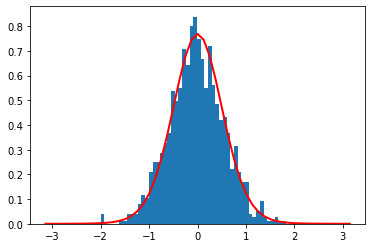

In [22]:
from scipy.special import i0 # import module
# Plot histogram from von meises data
plt.hist(s, 50, density=True)

# create probability density function and plot with histogram
x = np.linspace(-np.pi, np.pi, num=51) # np.linspaace command explained [15]
y = np.exp(kappa*np.cos(x-mu))/(2*np.pi*i0(kappa))  
plt.plot(x, y, linewidth=2, color='r')  # plot line
plt.show()

Above is an example of data graphed using the vonmeises distribution. [16]

https://en.wikipedia.org/wiki/Von_Mises_distribution

---------------

* ### Distribution 2: binomial

**Generator.binomial(n, p, size=None)**
 
Creates a sample from a binomial distributon. The specific paramaters are; n, the number of trialls, and  p, the probability of sucess. 

"A binomial distribution can be thought of as simply the probability of a SUCCESS or FAILURE outcome in an experiment or survey that is repeated multiple times." [18] It is a type of distribution that has two possible outcomes. e.g coin toss - heads or tails. 

* Parameters 
    * n: trialls - paramater of the distribution greater than or equal to zero.
    * p: probability of success, in the interval [1,0]
    * size: output shape

* Returns
    * out: ndarray or scalar - Drawn samples from the parameterized binomial distribution, where each sample is equal to the number of successes over the n trials.
    
Note: for more information on this function see numpy documentation. [17]

Examples

In [23]:
rng = np.random.default_rng()
n, p = 10, .5  # number of trials, probability of each trial
s = rng.binomial(n, p, 10000)
# result of flipping a coin 10 times, tested 10000 times.
s
# plt.hist(s, bins=10, range=None, rwidth=None, color=None, label="tEST")


array([5, 7, 3, ..., 5, 5, 4], dtype=int64)

(array([  14.,  103.,  458., 1212., 2072., 2394., 2032., 1174.,  436.,
         105.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

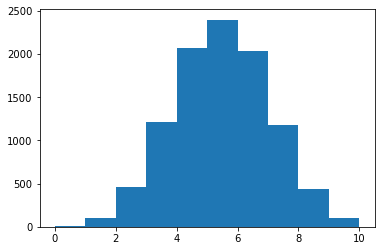

In [24]:
plt.hist(s, bins=10, range=None, rwidth=None, color=None, label="tEST")

# matplotlib.pyplot.hist(x, bins=2 range=None, rwidth=None, color=None, label=tEST)

# Write more info on binomial distributions

---------------

* ### Distribution 3: Uniform

**Generator.uniform(low=0.0, high=1.0, size=None)**

Draws a sample of a iniform distribution. Any value within the given interval is equally likely to be drawn. 

A uniform distribution is a probability distribution that has constant probability. [20]

* Parameters 
    * low: lower boundary. values will be greater than or equal to. 
    * high: upper boundary. values will be less than. 
    * size: output shape

* Returns
    * out: ndarray or scalar - Drawn samples from the parameterized uniform distribution
    
Note: for more information on this function see numpy documentation. [19]

Examples

(array([11.,  7.,  2., 14., 13.,  9., 14., 12.,  9.,  9.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

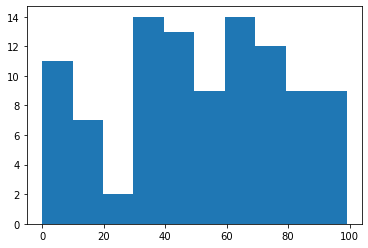

In [25]:
# set size = 100
x = rng.integers(100, size=100)
plt.hist(x)

(array([10032.,  9961., 10100.,  9872., 10128.,  9876.,  9979., 10081.,
        10001.,  9970.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

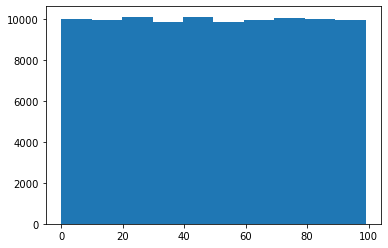

In [26]:
# set size = 100000
x = rng.integers(100, size=100000)
plt.hist(x)

The first plot shows 100 numbers drawn from 1 - 100. It is not immidiatly apparent that this is a uniofrm samle. Plotting 100,000 numbers gives us a better understanding of the uniform distribution. 

This is generally the distribution expected from a computer when a random generated number is needed. So the number 4 is as likely to come out as the number 10,000 etc. It will generate all numbers with the same probability.

-------------

* ### Distribution 4: normal

**numpy.random.normal(loc=0.0, scale=1.0, size=None)**

Draw random samples from a normal (Gaussian) distribution.

"The normal distribution is the most important probability distribution in statistics because it fits many natural phenomena. For example, heights, blood pressure, measurement error, and IQ scores follow the normal distribution. It is also known as the Gaussian distribution and the bell curve." [22]

It is a symmetric distribution where most of the observations cluster around the central peak and the probabilities for values further away from the mean taper off equally in both directions. Extreme values in both tails of the distribution are similarly unlikely.


* Parameters 
    * loc: mean of the distribution
    * scale: standard deviation of the distribution
    * size: output shape
    
* Returns
    * out: ndarray or scalar - Drawn samples from the parameterized normal distribution
    
Note: for more information on this function see numpy documentation. [21]

Examples

In [27]:
 # Students heights - centerd around middle. distribouts towards each side. 

(array([ 12.,  54., 120., 240., 234., 188., 103.,  41.,   5.,   3.]),
 array([-0.28383722, -0.21891558, -0.15399394, -0.0890723 , -0.02415066,
         0.04077098,  0.10569262,  0.17061427,  0.23553591,  0.30045755,
         0.36537919]),
 <a list of 10 Patch objects>)

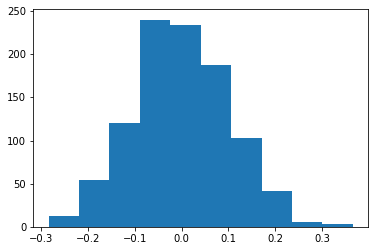

In [28]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
plt.hist(s)

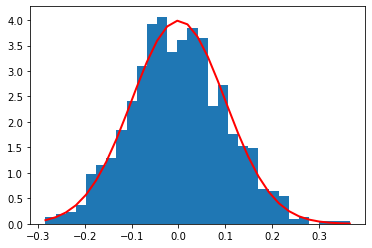

In [29]:
# Probability density function plotted

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

This allows us to match the probability expected with real world data. eg. class heights. etc. 

----------------

* ### Distribution 5: chisquare

**Generator.chisquare(df, size=None)**

Draw samples from a chi-square distribution.

In probability theory and statistics, the chi-square distribution with df degrees of freedom is the distribution of a sum of the squares of df independent standard normal random variables. The chi-square distribution is a special case of the gamma distribution and is one of the most widely used probability distributions in inferential statistics, notably in hypothesis testing and in construction of confidence intervals.[25]


* Parameters 
    * df: number of degrees of freedom
    * size: output shape
    
* Returns
    * out: ndarray or scalar - Drawn samples from the parameterized chi-square distribution.
    
Note: for more information on this function see numpy documentation. [21]

Examples

In [35]:
# Draw out a sample for chi squared distribution with degree of freedom 2 with size 2x3 
x = np.random.chisquare(df=2, size=(2, 3))
x

array([[1.65151759, 1.55483163, 1.29090441],
       [3.36856723, 7.69835316, 3.84654517]])

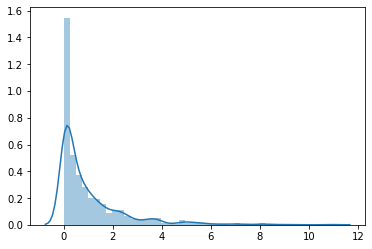

In [38]:
# plot visualisaton of chisquare with 1 degree of freedom
x = np.random.default_rng().chisquare(1,1000)
sns.distplot(x)
plt.show()

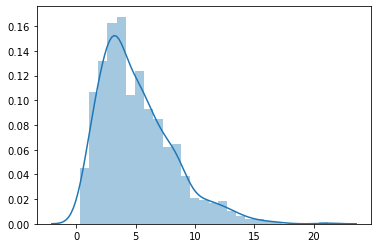

In [39]:
# plot visualisaton of chisquare with 5 degree of freedom
x = np.random.default_rng().chisquare(5,1000)
sns.distplot(x)
plt.show()

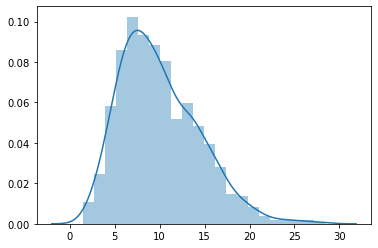

In [40]:
# plot visualisaton of chisquare with 10 degree of freedom
x = np.random.default_rng().chisquare(10,1000)
sns.distplot(x)
plt.show()

The above three plots show teh difference in 1, 5 and 10 degrees of freedom. The chi-square distribution is typically used to develop hypothesis tests and confidence intervals. In a testing context, the chi-square distribution is treated as a "standardized distribution" [24]

------------

## Section 4. Explain the use of seeds in generating pseudorandom numbers.

------------


https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html#numpy.random.seed

For legacy reasons. Further research needed

https://numpy.org/doc/stable/reference/random/bit_generators/mt19937.html

## References
----------

[1] https://numpy.org/doc/stable/reference/random/index.html

[2] https://www.w3schools.com/python/numpy_random.asp

[3] https://realpython.com/python-random/

[4] https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator

[5] https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html#numpy.random.rand

[6] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers

[7] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice

[8] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes

[9] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle

[10] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation

[11] https://en.wikipedia.org/wiki/Permutation

[12] https://en.wikipedia.org/wiki/Rubik%27s_Cube#Permutations

[13] https://numpy.org/doc/stable/reference/random/generated/numpy.random.vonmises.html#numpy.random.vonmises

[14] https://www.statisticshowto.com/von-mises-distribution/

[15] https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

[16] https://en.wikipedia.org/wiki/Von_Mises_distribution

[17] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

[18] https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/

[19] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform

[20] https://www.statisticshowto.com/uniform-distribution/

[21] https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy.random.normal

[22] https://statisticsbyjim.com/basics/normal-distribution/

[23] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.chisquare.html#numpy.random.Generator.chisquare

[24] https://www.w3schools.com/python/numpy_random_chisquare.asp

[25] https://en.wikipedia.org/wiki/Chi-square_distribution


[2] https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html

[3]  https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generatorhttps://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator
